In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.preprocessing import PowerTransformer

plt.style.use('fivethirtyeight')

In [2]:
swiggy=pd.read_csv("swiggy_cleaned.csv")
swiggy.shape

(45502, 26)

In [3]:
swiggy.head(4)

,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,weather,traffic,...,time_taken,city_name,order_day,order_month,order_day_of_week,is_weekend,pickup_time_minutes,order_time_hour,order_time_of_day,distance
0,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,sunny,high,...,24,INDO,19,3,saturday,1,15.0,11.0,morning,3.025149
1,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,stormy,jam,...,33,BANG,25,3,friday,0,5.0,19.0,evening,20.183530
2,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,sandstorms,low,...,26,BANG,19,3,saturday,1,15.0,8.0,morning,1.552758
3,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,sunny,medium,...,21,COIMB,5,4,tuesday,0,10.0,18.0,evening,7.790401


In [4]:
swiggy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45502 entries, 0 to 45501
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   rider_id              45502 non-null  object 
 1   age                   43648 non-null  float64
 2   ratings               43594 non-null  float64
 3   restaurant_latitude   41872 non-null  float64
 4   restaurant_longitude  41872 non-null  float64
 5   delivery_latitude     41872 non-null  float64
 6   delivery_longitude    41872 non-null  float64
 7   order_date            45502 non-null  object 
 8   weather               44977 non-null  object 
 9   traffic               44992 non-null  object 
 10  vehicle_condition     45502 non-null  int64  
 11  type_of_order         45502 non-null  object 
 12  type_of_vehicle       45502 non-null  object 
 13  multiple_deliveries   44509 non-null  float64
 14  festival              45274 non-null  object 
 15  city_type          

#### Functions  for EDA:

In [5]:
# Function for numerical analysis:
def numerical_analysis(df,numerical_feature,categorical_feature=None):
    
    fig,ax=plt.subplots(ncols=2,nrows=1,figsize=(10,5))

    # KDE and boxplot for the numerical features:
    sns.kdeplot(x=df[numerical_feature],fill=True,color='purple',ax=ax[0],hue=categorical_feature)
    sns.boxplot(x=df[numerical_feature],color='red',linewidth=0.7,ax=ax[1],hue=categorical_feature)

    # Statistics for the numerical features:
    mean=df[numerical_feature].mean()
    median=df[numerical_feature].median()
    std=df[numerical_feature].std()
    skew=df[numerical_feature].skew()

    stats_text=(
        f"Mean:{round(mean,2)}\n"
        f"Median:{round(median,2)}\n"
        f"Std:{round(std,2)}\n"
        f"skew:{round(skew,2)}"
    )
    
    ax[0].text(
        0.98,0.98,
        stats_text,
        ha='right',
        va='top',
        transform=ax[0].transAxes,
        bbox=dict(facecolor='white', alpha=0.7,edgecolor='black',linewidth=1.5),
        fontsize=10
    )

    plt.tight_layout()
    plt.show()

In [6]:
def numerical_categroical(df:pd.DataFrame,numerical_col:str,catergorical_col:str)->None:

    fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
    
    sns.barplot(data=df,x=catergorical_col,y=numerical_col)
    sns.boxplot(data=df,x=catergorical_col,y=numerical_col)

In [7]:
# Function to check normality:
def normality_check(df,feature,alpha=0.05):
    
    stat,p_value=stats.jarque_bera(df[feature])
    print(f"The p_value is:{p_value}")

    if p_value<=alpha:
        print("Reject Null Hypothesis. The data is not normally distributed")
    else:
        print("Fail to reject Null Hypothesis. The data is normally distributed")

# ANOVA:



In [8]:
numerical_cols=[cols for cols in swiggy.columns if swiggy[cols].dtype in ['int64','float64']]
numerical_cols

['age',
 'ratings',
 'restaurant_latitude',
 'restaurant_longitude',
 'delivery_latitude',
 'delivery_longitude',
 'vehicle_condition',
 'multiple_deliveries',
 'time_taken',
 'order_day',
 'order_month',
 'is_weekend',
 'pickup_time_minutes',
 'order_time_hour',
 'distance']

In [9]:
categorical_cols=[cols for cols in swiggy.columns if swiggy[cols].dtype=='object']
categorical_cols

['rider_id',
 'order_date',
 'weather',
 'traffic',
 'type_of_order',
 'type_of_vehicle',
 'festival',
 'city_type',
 'city_name',
 'order_day_of_week',
 'order_time_of_day']

In [10]:
swiggy[numerical_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
age,43648.0,29.555008,5.761482,20.000000,25.000000,30.000000,35.000000,39.000000
ratings,43594.0,4.635287,0.313827,2.500000,4.500000,4.700000,4.900000,5.000000
restaurant_latitude,41872.0,18.913696,5.467265,9.957144,12.986047,19.065838,22.751234,30.914057
restaurant_longitude,41872.0,76.921664,3.503107,72.768726,73.897902,76.618203,78.368855,88.433452
delivery_latitude,41872.0,18.977356,5.469056,9.967144,13.065996,19.124049,22.820040,31.054057
delivery_longitude,41872.0,76.985325,3.503260,72.778726,73.940327,76.662620,78.405467,88.563452
vehicle_condition,45502.0,1.019406,0.835229,0.000000,0.000000,1.000000,2.000000,3.000000
multiple_deliveries,44509.0,0.744928,0.572488,0.000000,0.000000,1.000000,1.000000,3.000000
time_taken,45502.0,26.297591,9.386419,10.000000,19.000000,26.000000,32.000000,54.000000
order_day,45502.0,13.811657,8.709540,1.000000,6.000000,13.000000,20.000000,31.000000


In [11]:
swiggy[categorical_cols].describe(include='object').T

,count,unique,top,freq
rider_id,45502,1320,PUNERES01DEL01,67
order_date,45502,44,2022-03-15,1190
weather,44977,6,fog,7654
traffic,44992,4,low,15477
type_of_order,45502,4,snack,11512
type_of_vehicle,45502,4,motorcycle,26427
festival,45274,2,no,44380
city_type,44304,3,metropolitian,34029
city_name,45502,22,JAP,3439
order_day_of_week,45502,7,wednesday,7077


#### Inspecting the target column (Time Taken):

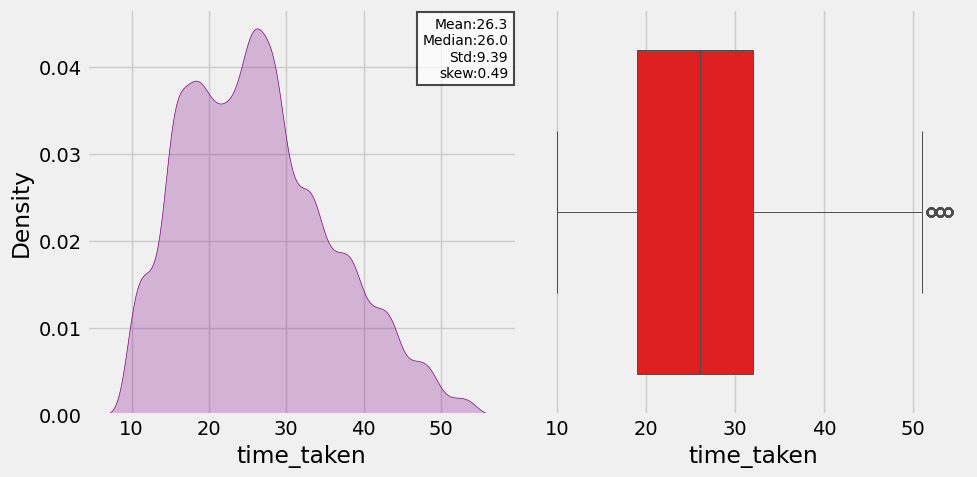

In [12]:
numerical_analysis(swiggy,'time_taken')

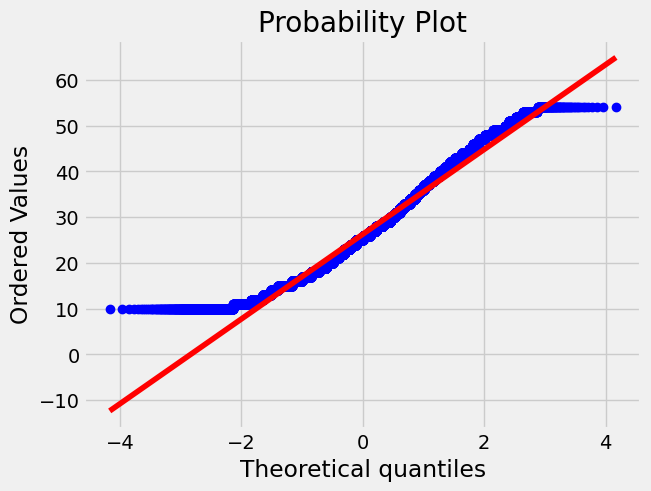

In [13]:
stats.probplot(swiggy['time_taken'],plot=plt)
plt.show()

In [14]:
normality_check(swiggy,'time_taken')

The p_value is:0.0
Reject Null Hypothesis. The data is not normally distributed


In [15]:
box_cox=PowerTransformer()
swiggy['time_taken_pt']=box_cox.fit_transform(swiggy[['time_taken']])

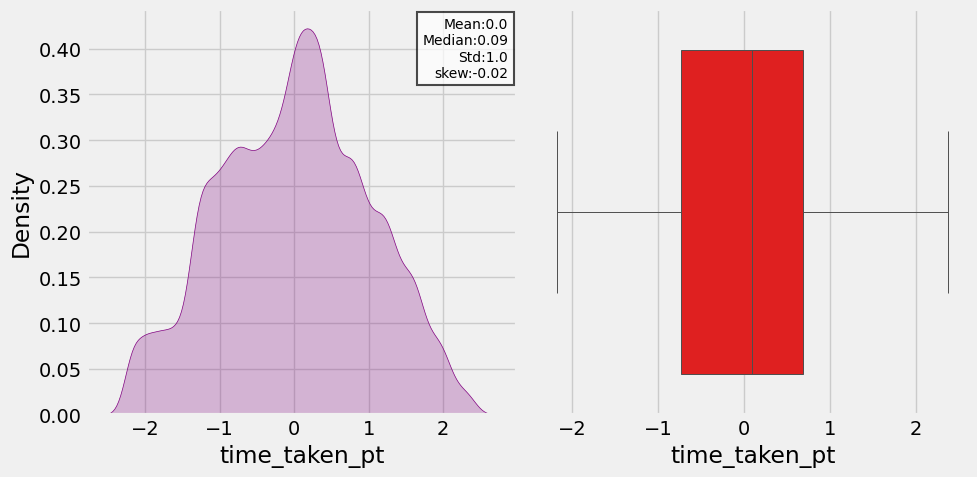

In [16]:
numerical_analysis(swiggy,'time_taken_pt')

**Time Taken** is not normally distributed, but to make it approximately symmetric we used box cox transformation. 

#### Analyzing Age feature:

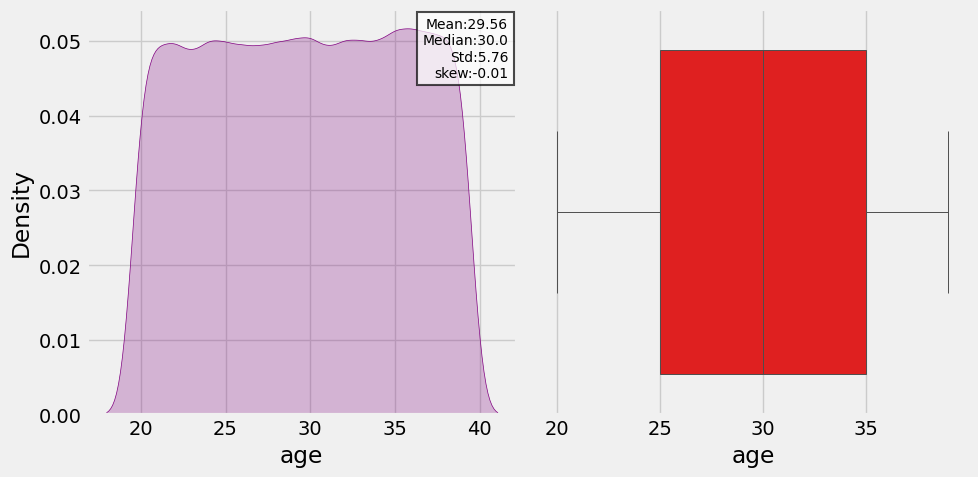

In [17]:
numerical_analysis(swiggy,'age')

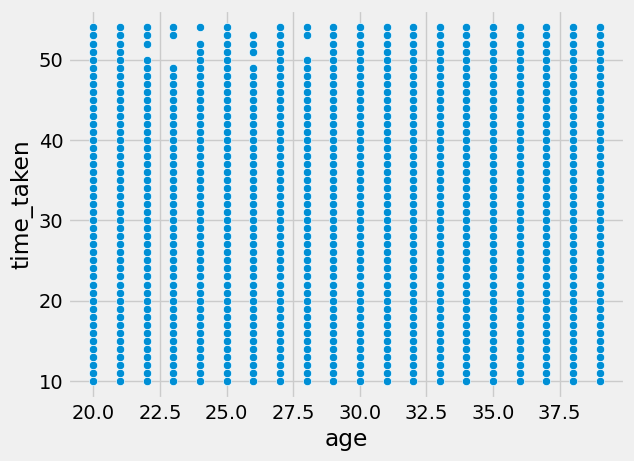

In [18]:
sns.scatterplot(data=swiggy,x='age',y='time_taken')
plt.show()

**Age** approximately has a uniform distribution between the age of people 20 to 40. There is not much variation between the time taken and the ae of the rider. Roughly all drivers take about 10 to 50 min to deliver the food items. 


#### Analyzing Rating feature:

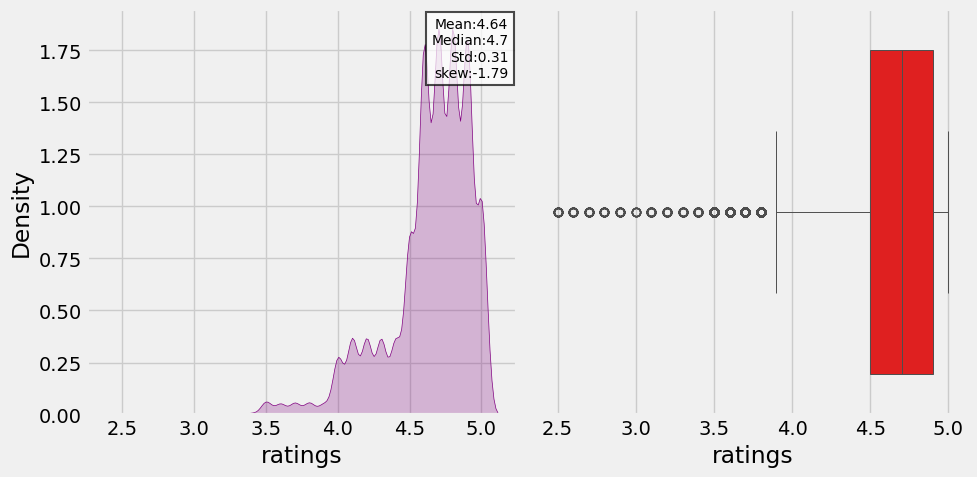

In [19]:
numerical_analysis(swiggy,'ratings')

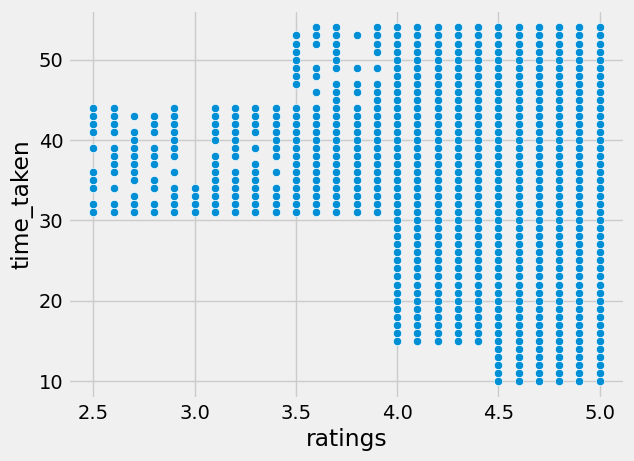

In [20]:
sns.scatterplot(data=swiggy,x='ratings',y='time_taken')
plt.show()

**Rating** follows a left-skewed distribution. Most of the rating is between 4.5 to 5. However, there are some drivers who have received rating less than 4 which is very less. This also shows that usually drivers with higher rating tend to get more delivery orders that range from 10 min to 50 min, whereas drivers with less rating only receive orders for higher time (which might be because we do not have high rating drivers available)